In [3]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [4]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [5]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

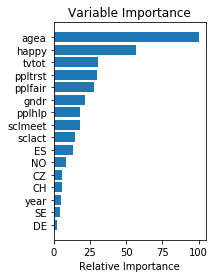

In [6]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

In [8]:
X

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1,0,0,0,0,0
6,6,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,1,0,0,0,0,0
7,6,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,1,0,0,0,0,0
8,6,2.0,8.0,8.0,8.0,9.0,6.0,4.0,2.0,84.0,1,0,0,0,0,0
9,6,4.0,4.0,4.0,8.0,7.0,4.0,2.0,2.0,62.0,1,0,0,0,0,0
10,6,1.0,6.0,7.0,7.0,9.0,5.0,2.0,2.0,33.0,1,0,0,0,0,0


In [9]:
X['Adult_65plus'] = np.where(df['agea'] >= 65, 1, 0)

             idno      year     tvtot   ppltrst   pplfair    pplhlp     happy  \
idno     1.000000  0.002102  0.003963 -0.007523  0.007397  0.004484 -0.003065   
year     0.002102  1.000000 -0.031596 -0.001600  0.004283 -0.032901 -0.013378   
tvtot    0.003963 -0.031596  1.000000 -0.142422 -0.119277 -0.069080 -0.118598   
ppltrst -0.007523 -0.001600 -0.142422  1.000000  0.597506  0.459250  0.231533   
pplfair  0.007397  0.004283 -0.119277  0.597506  1.000000  0.480931  0.247755   
pplhlp   0.004484 -0.032901 -0.069080  0.459250  0.480931  1.000000  0.215323   
happy   -0.003065 -0.013378 -0.118598  0.231533  0.247755  0.215323  1.000000   
sclmeet -0.021376 -0.028502 -0.078864  0.122555  0.096501  0.080489  0.182944   
sclact   0.004323  0.012150 -0.092375  0.137491  0.128808  0.092673  0.192030   
gndr     0.010851  0.001355  0.017922 -0.029921  0.022251  0.042046 -0.022413   
agea     0.030051 -0.003520  0.257674 -0.029412  0.014724  0.040351 -0.042970   
partner -0.014931  0.018689 

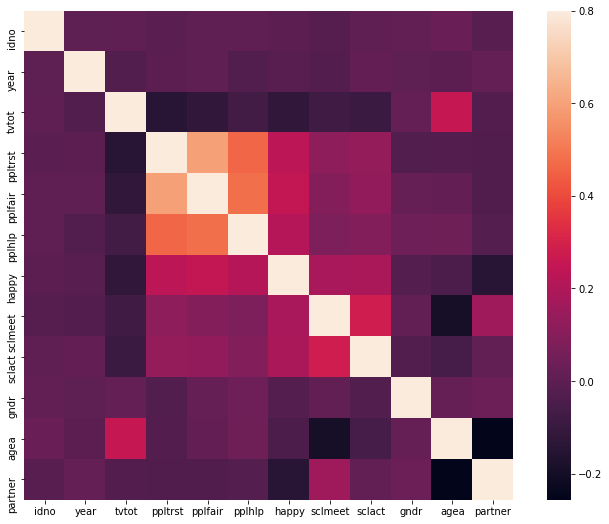

In [34]:
# Make the correlation matrix.
corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

import seaborn as sns
# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [11]:
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [55]:
X_trans = X[['agea', 'sclmeet', 'happy', 'year']]
y = df['partner'] - 1

pca = PCA(n_components=10)
X_trans = pca.fit_transform(X)

In [56]:
# Create training and test sets.
offset = int(X_trans.shape[0] * 0.8)

# Put 80% of the data in the training set.
X_trans_train, y_train = X_trans[:offset], y[:offset]

# And put 20% in the test set.
X_trans_test, y_test = X_trans[offset:], y[offset:]

In [57]:
y_train

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
6       0.0
7       0.0
8       1.0
9       0.0
10      0.0
11      0.0
12      0.0
13      1.0
14      0.0
15      0.0
16      0.0
17      0.0
18      1.0
19      0.0
20      0.0
21      1.0
22      0.0
23      1.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
30      1.0
       ... 
6859    0.0
6860    0.0
6861    0.0
6862    0.0
6863    0.0
6864    1.0
6865    1.0
6866    1.0
6867    0.0
6868    1.0
6869    0.0
6870    0.0
6871    1.0
6872    1.0
6873    0.0
6874    1.0
6875    0.0
6876    0.0
6877    0.0
6878    0.0
6879    1.0
6880    0.0
6881    0.0
6882    0.0
6883    0.0
6884    0.0
6885    0.0
6886    0.0
6887    0.0
6888    1.0
Name: partner, Length: 6517, dtype: float64

In [58]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_trans_train, y_train)

predict_train = clf.predict(X_trans_train)
predict_test = clf.predict(X_trans_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.03498542274052478
Percent Type II errors: 0.16602731318091146

Test set accuracy:
Percent Type I errors: 0.08834355828220859
Percent Type II errors: 0.17730061349693252


In [12]:
# try other loss fcn

# We'll make 500 iterations, use -deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0, 1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0, 0.0] / table_train.loc['All', 'All']

test_tI_errors = table_test.loc[0.0, 1.0]/table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0, 0.0]/table_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04841789416257501
Percent Type II errors: 0.1778505182760502

Test set accuracy:
Percent Type I errors: 0.0638036809815951
Percent Type II errors: 0.18773006134969325


## seems like our error % got increased for Type I errors


In [13]:
# try other loss fcn and deeper trees

# We'll make 500 iterations, use -deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 3,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0, 1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0, 0.0] / table_train.loc['All', 'All']

test_tI_errors = table_test.loc[0.0, 1.0]/table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0, 0.0]/table_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.03505182760501909
Percent Type II errors: 0.15234588106928532

Test set accuracy:
Percent Type I errors: 0.08466257668711656
Percent Type II errors: 0.18159509202453988


## seems like our Type I and II error % went down for both training and test sets
- deviance as loss must be better and increasing the number of steps seems to increase our accuracy

## next let's try a larger test and smaller train set

In [14]:
# Definine outcome and predictors. Drop more features

# Set our outcome to 0 and 1.
X_n = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno', 'sclact'])]

# Make the categorical variable 'country' into dummies.
X_n = pd.concat([X_n, pd.get_dummies(df['cntry'])], axis=1)

# Create larger training and test sets.
offset = int(X_n.shape[0] * 0.5)

# Put 50% of the data in the training set.
X_ntrain, y_ntrain = X_n[:offset], y[:offset]

# And put 50% in the test set.
X_ntest, y_ntest = X_n[offset:], y[offset:]

In [15]:
# We'll make 500 iterations, use -deep trees, and set our loss function.
params_n = {'n_estimators': 500,
            'max_depth': 3,
            'loss': 'deviance'}

# Initialize and fit the model.
clf_n = ensemble.GradientBoostingClassifier(**params_n)
clf_n.fit(X_ntrain, y_ntrain)

predict_ntrain = clf_n.predict(X_ntrain)
predict_ntest = clf_n.predict(X_ntest)

# Accuracy tables.
table_ntrain = pd.crosstab(y_ntrain, predict_ntrain, margins=True)
table_ntest = pd.crosstab(y_ntest, predict_ntest, margins=True)

train_tI_nerrors = table_ntrain.loc[0.0, 1.0] / table_ntrain.loc['All', 'All']
train_tII_nerrors = table_ntrain.loc[1.0, 0.0] / table_ntrain.loc['All', 'All']

test_tI_nerrors = table_ntest.loc[0.0, 1.0]/table_ntest.loc['All', 'All']
test_tII_nerrors = table_ntest.loc[1.0, 0.0]/table_ntest.loc['All', 'All']


print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_nerrors, train_tII_nerrors, test_tI_nerrors, test_tII_nerrors))

Training set accuracy:
Percent Type I errors: 0.026516081512398725
Percent Type II errors: 0.1367542352074638

Test set accuracy:
Percent Type I errors: 0.07142857142857142
Percent Type II errors: 0.19096710849288168


In [16]:
# import sv classifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC()
cross_val_score(svc, X_n, y, cv=5)

array([0.7607362 , 0.73128834, 0.74601227, 0.72805402, 0.74385749])

## now add iterations
- what other feature engineering could we do?


Weak learner 0 R^2: -0.003443484598953494
Weak learner 20 R^2: -0.0022607449233009724
Weak learner 40 R^2: -0.0022567702554556757
Weak learner 60 R^2: -0.0017182331843235144
Weak learner 80 R^2: -0.0016946745320047807
Weak learner 100 R^2: -0.0014330461987412946


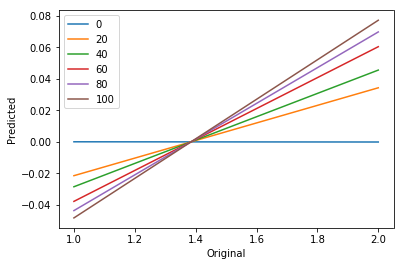

Overall R^2:
0.3692004449905773


In [24]:
from sklearn import tree
# Iterate through decision trees, each time using the residuals
# from the previous tree as the inputs.

uniquex = df['partner'].unique()

# Store values from loops.
preds = pd.DataFrame()
labels = []

for m in range(0, 101):

    # Initialize and fit the tree. Set the max depth to 3.
    decision_tree = tree.DecisionTreeRegressor(max_depth=3)
    decision_tree.fit(X_n, y)

    # Get and store predicted values.
    pred = decision_tree.predict(X_n)
    preds['pred{}'.format(m)] = pred

    # Residuals.
    y = y - pred

    # Output every 20 iterations.
    if m % 20 == 0:
        print('Weak learner {} R^2: {}'.format(m, decision_tree.score(X_n, y)))
        labels = labels + [m]
        bestpred = preds.sum(axis=1)
        plt.plot(uniquex, np.poly1d(np.polyfit(
            df['partner'], bestpred, 1))(uniquex))

plt.legend(labels)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()
predicted = preds.sum(axis=1)

print('Overall R^2:')
print(np.corrcoef(df['partner'], predicted)[0, 1])

Weak learner 0 R^2: -1.1142290926511929
Weak learner 20 R^2: -0.005359245271092661
Weak learner 40 R^2: -0.004935304766751969
Weak learner 60 R^2: -0.0019711668436928065
Weak learner 80 R^2: -0.003648115098084492
Weak learner 100 R^2: -0.002959915756077569


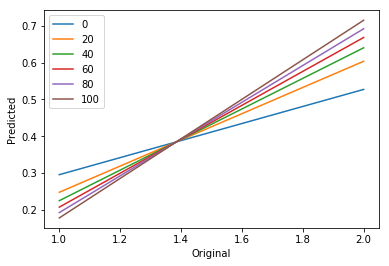

Overall R^2:
0.7405584672000437


In [59]:
# Iterate through decision trees, each time using the residuals
# from the previous tree as the inputs.

uniquex = df['partner'].unique()

# Store values from loops.
preds = pd.DataFrame()
labels = []

for m in range(0, 101):

    # Initialize and fit the tree. Set the max depth to 3.
    decision_tree = tree.DecisionTreeRegressor(max_depth=3)
    decision_tree.fit(X_trans, y)

    # Get and store predicted values.
    pred = decision_tree.predict(X_trans)
    preds['pred{}'.format(m)] = pred

    # Residuals.
    y = y - pred

    # Output every 20 iterations.
    if m % 20 == 0:
        print('Weak learner {} R^2: {}'.format(m, decision_tree.score(X_trans, y)))
        labels = labels + [m]
        bestpred = preds.sum(axis=1)
        plt.plot(uniquex, np.poly1d(np.polyfit(
            df['partner'], bestpred, 1))(uniquex))

plt.legend(labels)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()
predicted = preds.sum(axis=1)

print('Overall R^2:')
print(np.corrcoef(df['partner'], predicted)[0, 1])

Weak learner 0 R^2: -0.0039557767619822215
Weak learner 20 R^2: -0.0021789006708574643
Weak learner 40 R^2: -0.0007001744825241296
Weak learner 60 R^2: -0.0014295726772344253
Weak learner 80 R^2: -0.0013176741320681806
Weak learner 100 R^2: -0.0015281875999626495


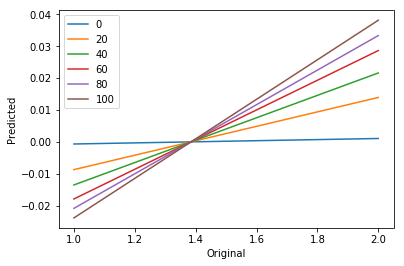

Overall R^2:
0.2759871971193447


In [60]:
# Iterate through decision trees, each time using the residuals
# from the previous tree as the inputs.

uniquex = df['partner'].unique()

# Store values from loops.
preds = pd.DataFrame()
labels = []

for m in range(0, 101):

    # Initialize and fit the tree. Set the max depth to 3.
    decision_tree = tree.DecisionTreeRegressor(max_depth=3)
    decision_tree.fit(X, y)

    # Get and store predicted values.
    pred = decision_tree.predict(X)
    preds['pred{}'.format(m)] = pred

    # Residuals.
    y = y - pred

    # Output every 20 iterations.
    if m % 20 == 0:
        print('Weak learner {} R^2: {}'.format(m, decision_tree.score(X, y)))
        labels = labels + [m]
        bestpred = preds.sum(axis=1)
        plt.plot(uniquex, np.poly1d(np.polyfit(
            df['partner'], bestpred, 1))(uniquex))

plt.legend(labels)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()
predicted = preds.sum(axis=1)

print('Overall R^2:')
print(np.corrcoef(df['partner'], predicted)[0, 1])